# Discovery and Learning with Big Data/Machine Learning
### Austin Glenn
### Unspervised Machine Learning: KMeans

### Description Iris Dataset

Data Set: Iris.csv
Title: Iris Plants Database
Updated Sept 21 by C. Blake -Added discrepancy information 
Sources:
- Creator: RA_ Fisher 
- Donor: Michael Marshall 
- Date: 1988 

Relevant Information: This is perhaps the best-known database to be found in the pattern recognition literature. Fishers paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example)

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. 

Predicted attribute: class of iris plant

Number of Instances: 150 (50 in each of three classes)

Number of predictors: 4 numeric, predictive attributes and the class Attribute Information:
- 1.sepal length in cm 
- 2.sepal width in cm 
- 3.petal length in cm 
- 4.petal width incm 
- 5.class: 
    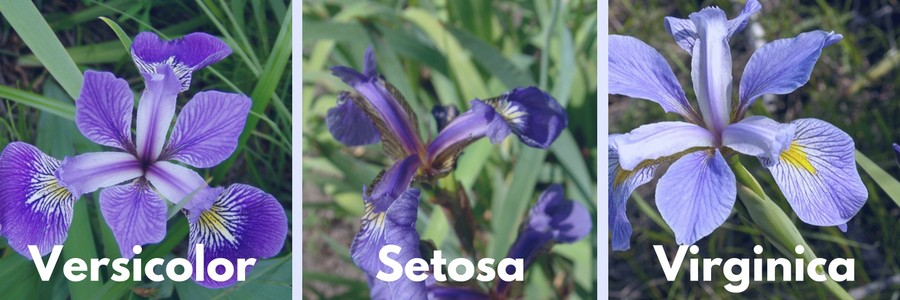


## <span style= 'color: red'>1. What is the Numpy library used for?  Enter your answer by adding a new code block and use markdown.</span>

Numpy is used for statistical analysis and operations by creating multi-dimensional arrays and matrix data structures 

In [1]:
# Import Python Libraries: NumPy and Pandas
import pandas as pd
import numpy as np

In [2]:
# Import Libraries & modules for data visualization
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## <span style= 'color: red'>2. What is the Scikit library used for?  Enter your answer by adding a new code block and use markdown.</span>

Scikit library is used for machine learning containing statistical modeling including classification, regression, clustering and dimensionality reduction

In [3]:
# Import scikit-Learn module for the algorithm/modeL: K-Means
from sklearn.cluster import KMeans

In [4]:
# Import scikit-Learn module for K-fold cross-validation - algorithm/modeL evaluation & validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## Load Data

In [5]:
# Specify location of the dataset
filename = 'Iris.csv'
df = pd.read_csv(filename)

### Look at the dataframe

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## <span style= 'color: red'>3. What is code below doing?  Enter your answer by adding a new code block and use markdown.</span>

The code below is reading the csv file Iris.csv by the Id column instead of the original index it starts with and finding the last 5 values in the dataset

## <span style= 'color: red'>4. What is the code index_col = 'Id' doing (If you run the code and compare with the output above, you should see the difference)?  Enter your answer by adding a new code block and use markdown.</span>

The code index_col is reading the csv file Iris.csv by the Id column instead of the original index it starts with

In [7]:
df = pd.read_csv('Iris.csv', index_col='Id')
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


## Preprocess the Dataset

#### Clean the data:  Find and Mark Missing Values


In [8]:
# mark zero values as missing or NaN
df[[ 'SepalLengthCm' , 'SepalWidthCm' , 'PetalLengthCm' ,'PetalWidthCm' ]] \
= df[['SepalLengthCm' , 'SepalWidthCm' ,'PetalLengthCm' , 'PetalWidthCm' ]].replace(0,np.NaN)
# count the number of NaN values in each column
print (df.isnull().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


## Performing the Exploratory Data Analysis (EDA)

## <span style= 'color: red'>5. Change the text of the print function to an alternative text of your choice. Enter your answer by adding a new code block and use markdown.</span>

print("Rows,Columns",df.shape)

In [9]:
# get the dimensions or shape of the dataset
# i.e. number of records / rows X number of variables / columns
print("Shape of the dataset(rows, columns):",df.shape)

Shape of the dataset(rows, columns): (150, 5)


## <span style= 'color: red'>6. What are the data type of the variables in this dataset?  Enter your answer by adding a new code block and use markdown.</span>

decimals

In [11]:
print(df.dtypes)

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


## <span style= 'color: red'>7. What is the mean of the PetalLengthCm variable?  Enter your answer by adding a new code block and use markdown.</span>

3.758667

## <span style= 'color: red'>8. What does std stand for in the code block output below?  Enter your answer by adding a new code block and use markdown.</span>

standard deviation

## <span style= 'color: red'>9. What is the std of the PetalLengthCm variable?  Enter your answer by adding a new code block and use markdown.</span>

1.764420

In [1]:
#return the summary statistics of the numeric variables / attributes in the data set
stats=(df.describe().T)
stats

NameError: name 'df' is not defined

## <span style= 'color: red'>10. Using the output from the code below, what is the range of the SepalLengthCm variable?  Enter your answer by adding a new code block and use markdown.</span>

3.600000

## <span style= 'color: red'>11.  Using the output from the code below, what does the range represent? Enter your answer by adding a new code block and use markdown.</span>

The distribution from the lowest to highest value 

## <span style= 'color: red'>12.  Using the output from the code below, what is the median of the PetalWidthCm variable?  Enter your answer by adding a new code block and use markdown.</span>

1.300000

In [13]:
#calculate range, and move columns 25%,50%,75%  and mean values into a dataframe
stats.loc['range'] = stats.loc['max'] - stats.loc['min']
new_df = stats.loc[['mean', 'range', '25%', '50%', '75%']]
new_df.rename({'50%': 'median'}, inplace=True)
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
mean,5.843333,3.054,3.758667,1.198667
range,3.600000,2.400,5.900000,2.400000
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000


In [14]:
#class distribution i.e. how many records are in each class
print(df.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [15]:
#  Calculate the median of each Species
x = df.groupby('Species').median()
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


### Creating  Histograms

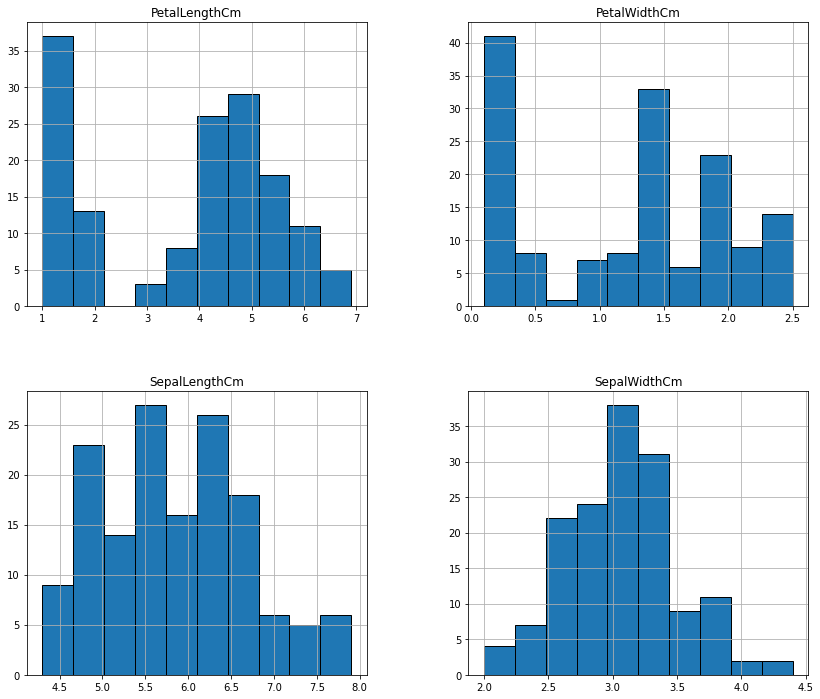

In [16]:
# Plot histogram for each variable. I encourage you to work with the histogram. Remember what you did in the previous homework.
df.hist(edgecolor= 'black',figsize=(14,12))
plt.show()

## <span style= 'color: red'>13. Change the edgecolor to 'red'.  Copy and past the code above into a new code block and use code.</span>

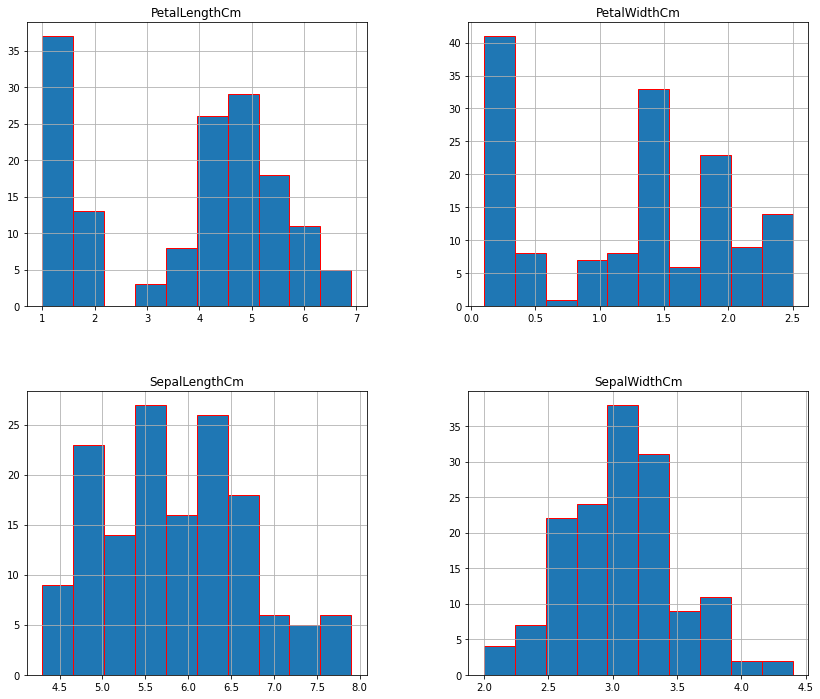

In [17]:
df.hist(edgecolor= 'red',figsize=(14,12))
plt.show()

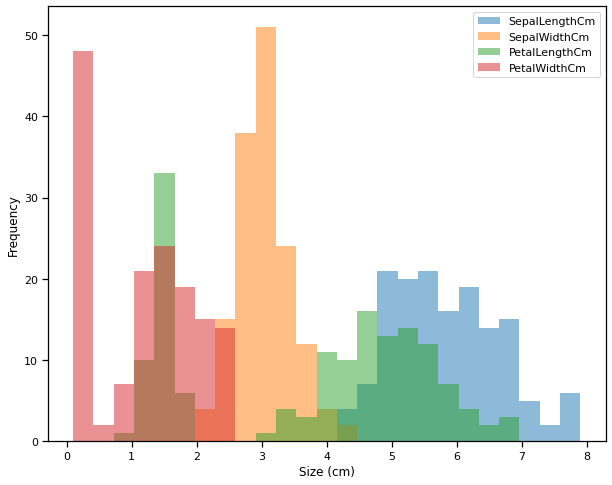

In [18]:
# Here the variables are superimposed on each other
import seaborn as sns
sns.set_context('notebook')


ax = df.plot.hist(bins=25, alpha=0.5, figsize= (10,8))
ax.set_xlabel('Size (cm)');

### Creating  Box Plots

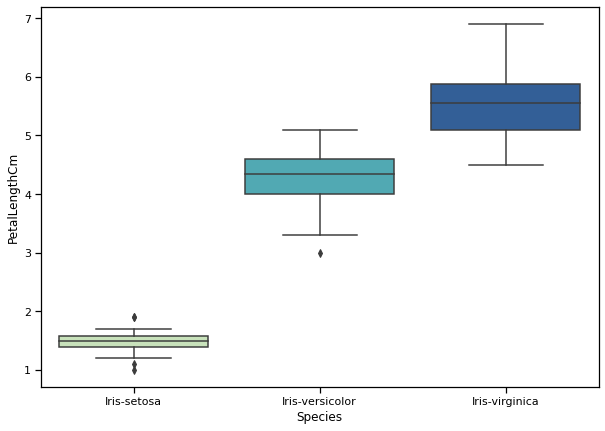

In [19]:
# Boxplots with color added and broken into each PetalLengthCm/Species
plt.figure(figsize=(10,7))
sns.boxplot(x='Species',y='PetalLengthCm',data=df ,palette='YlGnBu')

## <span style= 'color: red'>14. Look up what other colors can be used for palette in Seaborn and enter a new color.  Copy and paste the code above into a new code block and enter a new color into the color.  Don't forget to run your new code.</span>

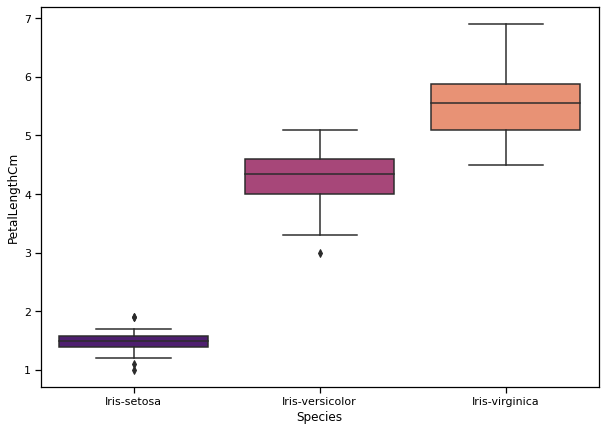

In [20]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Species',y='PetalLengthCm',data=df ,palette='magma')

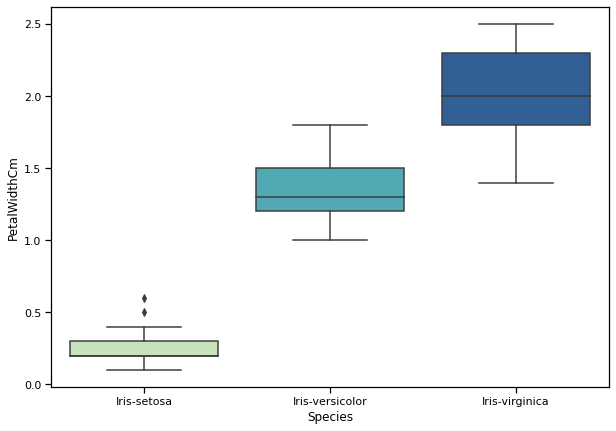

In [21]:
# Boxplots with color added and broken into each PetalWidthCm/Species
plt.figure(figsize=(10,7))
sns.boxplot(x='Species',y='PetalWidthCm',data=df ,palette='YlGnBu')

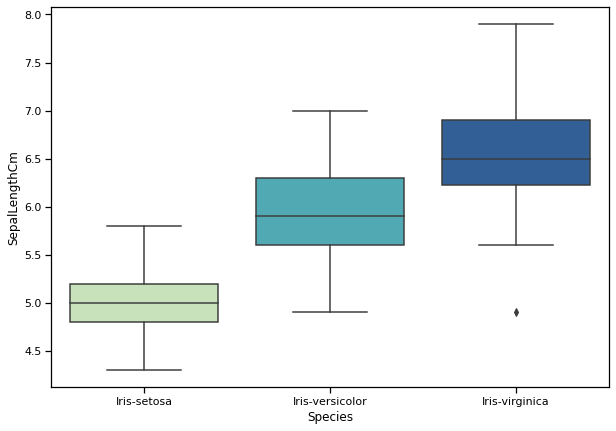

In [22]:
# Boxplots with color added and broken into each SepalLengthCm/Species
plt.figure(figsize=(10,7))
sns.boxplot(x='Species',y='SepalLengthCm',data=df ,palette='YlGnBu')

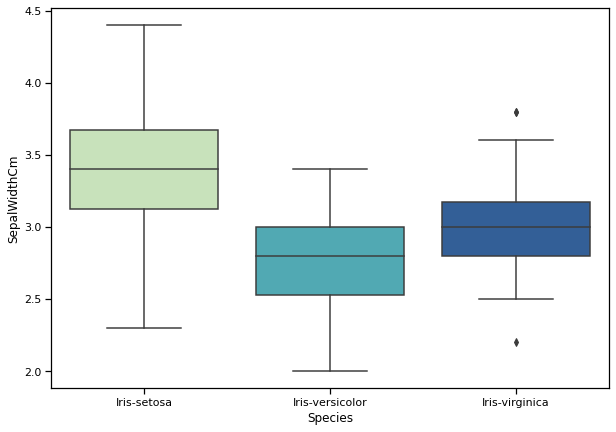

In [23]:
# Boxplots with color added and broken into each SepalWidthCm/Species
plt.figure(figsize=(10,7))
sns.boxplot(x='Species',y='SepalWidthCm',data=df ,palette='YlGnBu')

### Creating a Violin Plot  

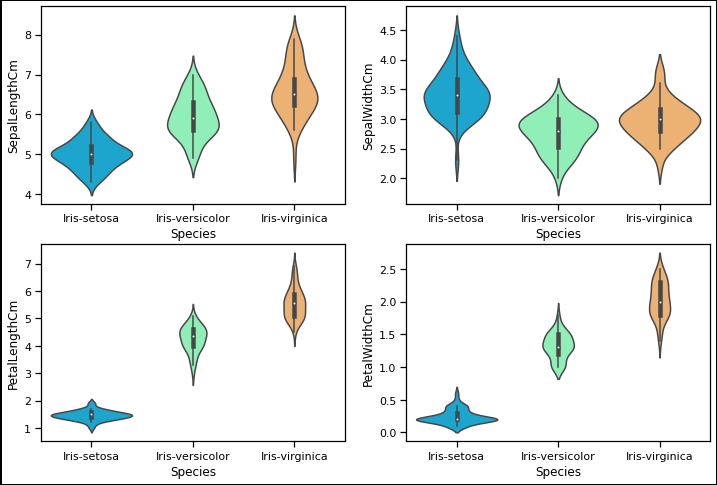

In [24]:
# Plot all violin plots together
plt.figure(edgecolor="black", linewidth= 1.2,figsize=(12,8));
plt.subplot(2,2,1)
sns.violinplot(x='Species', y = 'SepalLengthCm', data=df, palette='rainbow')
plt.subplot(2,2,2)
sns.violinplot(x='Species', y = 'SepalWidthCm', data=df, palette='rainbow')
plt.subplot(2,2,3)
sns.violinplot(x='Species', y = 'PetalLengthCm', data=df, palette='rainbow')
plt.subplot(2,2,4)
sns.violinplot(x='Species', y = 'PetalWidthCm', data=df, palette='rainbow');

## <span style= 'color: red'>15. Use the research you did earlier on the different palettes in Seaborn and change at least one of the variable's palette, using the code above.  Copy and Paste the code above into a newly created code block, make the change, and run the code.</span>

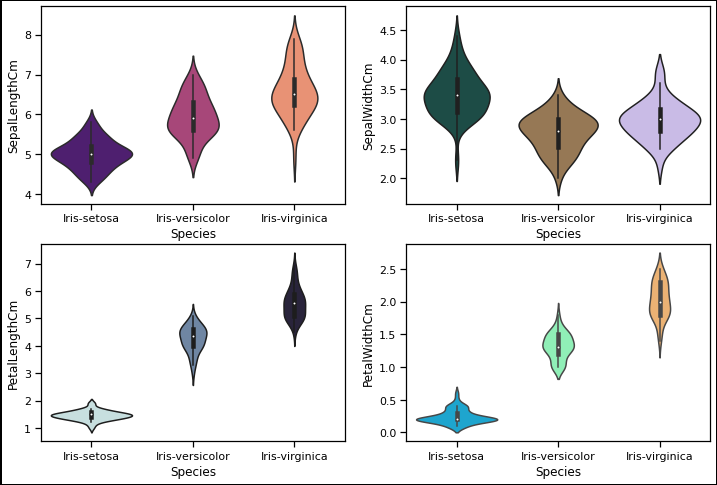

In [25]:
plt.figure(edgecolor="black", linewidth= 1.2,figsize=(12,8));
plt.subplot(2,2,1)
sns.violinplot(x='Species', y = 'SepalLengthCm', data=df, palette='magma')
plt.subplot(2,2,2)
sns.violinplot(x='Species', y = 'SepalWidthCm', data=df, palette='cubehelix')
plt.subplot(2,2,3)
sns.violinplot(x='Species', y = 'PetalLengthCm', data=df, palette='ch:start=.2,rot=-.3')
plt.subplot(2,2,4)
sns.violinplot(x='Species', y = 'PetalWidthCm', data=df, palette='rainbow');

### Create a Pair Plot 

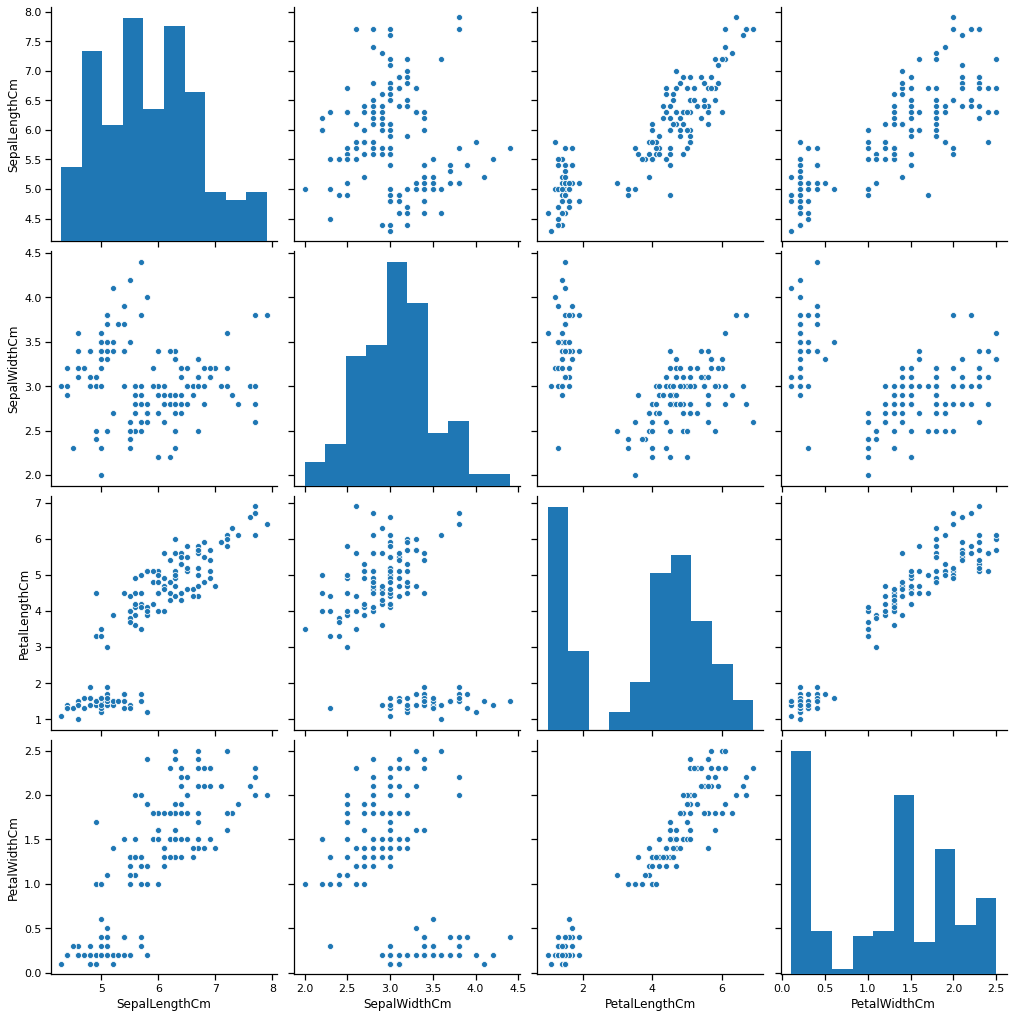

In [26]:
sns.pairplot(df, height=3.5);
plt.show()

### Creating a Pair Plot with Color

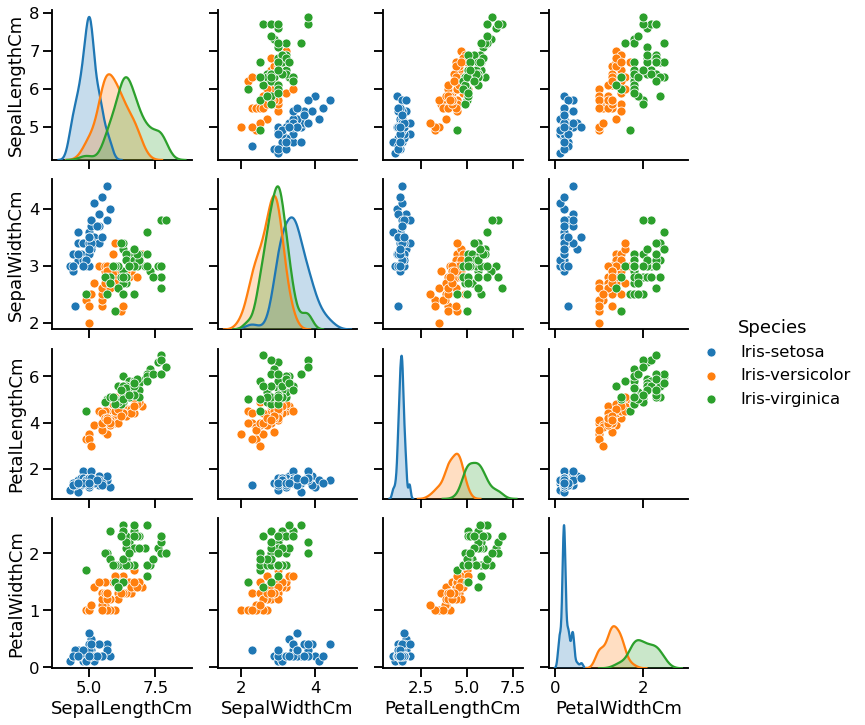

In [29]:
# Let's try that again using color.  Notice: assigning a hue variable adds a color to the graphs as well as a few other changes.

sns.set_context('talk')
sns.pairplot(df, hue='Species');


### Split the dataset into X (independent) and Y variables (dependent).

In [30]:
# store dataframe values into a numpy array
array= df.values
# separate array into input and output by slicing
# for X(input) [:, 0:4] --> all the rows, columns from 0 - 3 (does not include last column) 
# these are the independent variables or predictors

X= array[:,0:4]
# for Y(input) [:, 4] --> all the rows, column 4
# this is the value we are trying to predict
# we won't use this going forward, since this is an unsupervised model and we don't know the outcome. 
# we can actually hashtag this out since the dependent variable isn't used in this model.
# Y= array[:,4]

## <span style= 'color: red'>16. What is the algorithm we will use for this homework assignment?  Enter your answer by adding a new code block and use markdown.</span>

K-means -The number of observations into clusters by mean 

## <span style= 'color: red'>17. What are centroids?  Enter your answer by adding a new code block and use markdown.</span>

The center of a cluster

## <span style= 'color: red'>18. When is it best to use an odd number for K?  Enter your answer by adding a new code block and use markdown.</span>

Most of the time in order to avoid ties between two classifications 

In [31]:
# Build the model
# set cluster (K) to 3 to start
km= KMeans(n_clusters=3, random_state=21)
# defaults
# KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',random_state=None, tol=0.0001, verbose=0)
# Use the model to cluster the input data
km.fit(X)
centroids= km.cluster_centers_
print(centroids)

# These are vector values -each centroid has a vector of values -3 centroids 3 vectors of values -position values

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


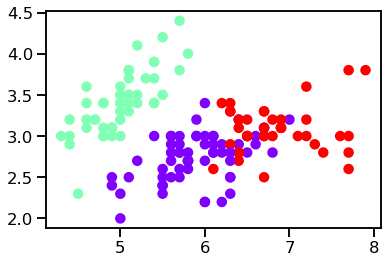

In [32]:
#  Plot all the data points without the centroids
plt.scatter(X[:, 0], X[:, 1], c=km.labels_, cmap='rainbow')
plt.show( )

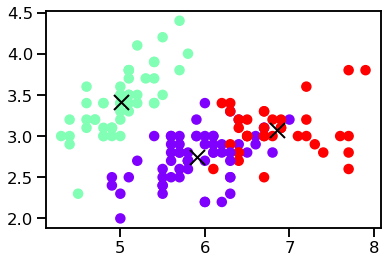

In [33]:
# Plot all the data points with centroids
# plot the data points with centroids
# plot using first and second variables of the vector
plt.scatter(X[:, 0], X[:, 1], c=km.labels_, cmap='rainbow')

lines= plt.plot(centroids[0,0],centroids[0,1], 'kx', color='black')
plt.setp(lines, ms=15.0)
plt.setp(lines, mew=2.0)

lines= plt.plot(centroids[1,0],centroids[1,1], 'kx', color='black')
plt.setp(lines, ms=15.0)
plt.setp(lines, mew=2.0)

lines= plt.plot(centroids[2,0],centroids[2,1], 'kx', color='black')
plt.setp(lines, ms=15.0)
plt.setp(lines, mew=2.0)

plt.show()

In the above illustration, which centroid represents which vector?  

We're using the the first and second variables of the vector -plt.scatter(X[:, 0], X[:, 1]

### Creating labels for the clusters

Text(0.5, 1.0, 'Predicted')

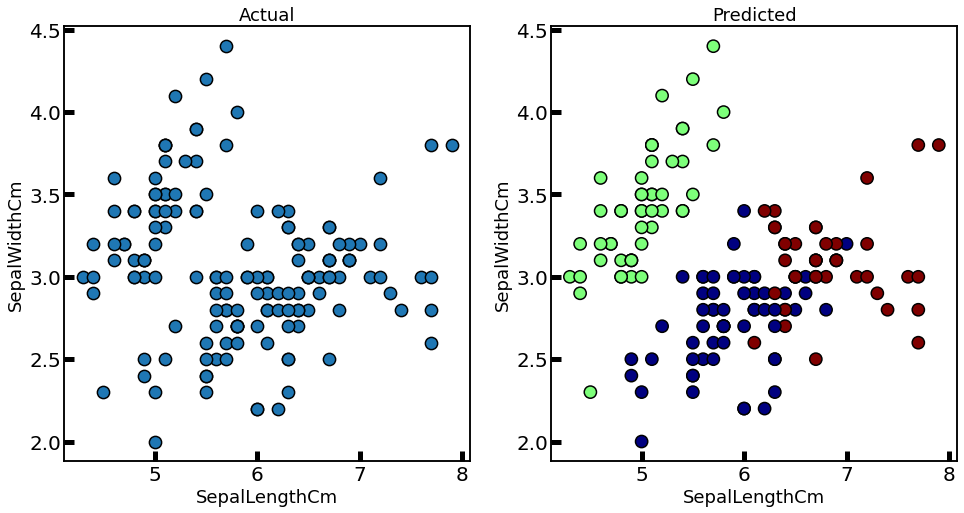

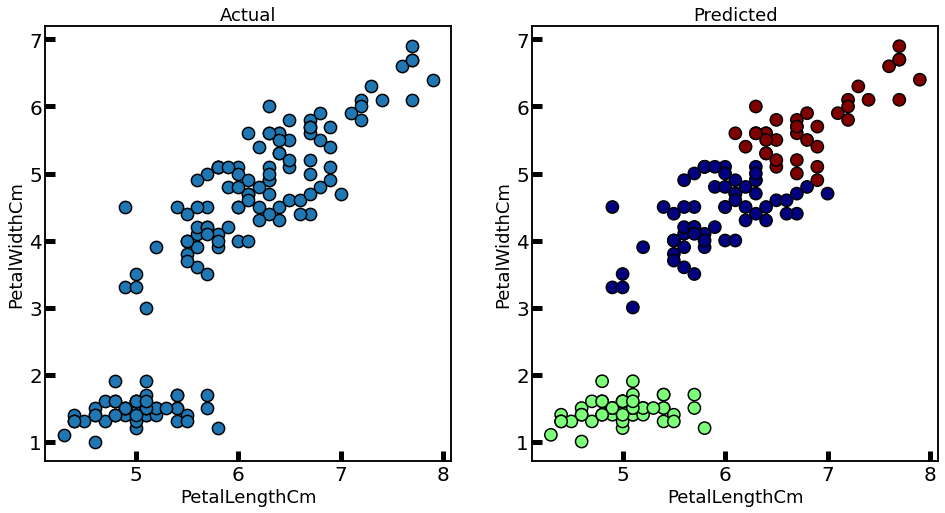

In [34]:
#this will tell us to which cluster does the data observations belong.
new_labels = km.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('SepalLengthCm', fontsize=18)
axes[0].set_ylabel('SepalWidthCm', fontsize=18)
axes[1].set_xlabel('SepalLengthCm', fontsize=18)
axes[1].set_ylabel('SepalWidthCm', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

#this will tell us to which cluster does the data observations belong.
new_labels = km.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 2], cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 2], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('PetalLengthCm', fontsize=18)
axes[0].set_ylabel('PetalWidthCm', fontsize=18)
axes[1].set_xlabel('PetalLengthCm', fontsize=18)
axes[1].set_ylabel('PetalWidthCm', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [52]:
# print 10 labels
cluster_labels= km.labels_[8::7]
print(cluster_labels)

[1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2]


## <span style= 'color: red'>19. What are the 3 clusters (not the flower species)?  Enter your answer by adding a new code block and use markdown.</span>

0 1 2

## Classify/Prediction

Let's use the model to predict/classify the flower type of a new record i.e. either Iris Setosa, or Iris Versicolor, or Iris Virginica.  

The new record has the following predictors:
- SepalLengthCm= 5.3
- SepalWidthCm = 3.0
- PetalLengthCm= 4.5
- PetalWidthCm= 1.5

You can enter the 2nd Prediction

In [53]:
# 1st prediction
#  Notice only the cluster number is given.  
kmeans= km.predict([[5.3, 3.0, 4.5, 1.5]])
print("The new flower is assigned to cluster ", kmeans)

The new flower is assigned to cluster  [0]


In [54]:
#2nd prediction
# Notice only the cluster number is given.
kmeans2 = km.predict([[5, 3.6, 1.4, 1.5]])
print("The new flower is assigned to cluster ", kmeans2)

The new flower is assigned to cluster  [1]


## <span style= 'color: red'>20. Why do we say the flower falls into Cluster 0, 1, or 2 and not the flower species name?  Enter your answer by adding a new code block and use markdown.</span>

Because it is the value of the centroids not the ID

## <span style= 'color: red'>21. This question is for you to enter any question or comments about the assignment.  Enter your answer by adding a new code block and use markdown.</span>

In [55]:
13. Change the edgecolor to 'red'. Copy and past the code above into a new code block and use code.¶

SyntaxError: invalid syntax (<ipython-input-55-aa435c8d3949>, line 1)